In [1]:
import pandas as pd

# Load the data
data_url = "https://raw.githubusercontent.com/Saniyaj21/Photo-Quality-Prediction/main/training.csv"
data = pd.read_csv(data_url)

# Drop unnecessary columns
data.drop(['name', 'description', 'caption'], axis=1, inplace=True)

# Separate target variable
target = data['good']
data.drop(['good'], axis=1, inplace=True)

# Inspect the first few rows
print(data.head())
print(data.info())

print(data.describe())


   id  latitude  longitude  width  height  size
0   1        45         16    604     453    31
1   2        21        -87    720     534    43
2   3        38        -97    720     540    71
3   4        38       -122    604     453    24
4   5       -29         24    720     540    13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40262 entries, 0 to 40261
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         40262 non-null  int64
 1   latitude   40262 non-null  int64
 2   longitude  40262 non-null  int64
 3   width      40262 non-null  int64
 4   height     40262 non-null  int64
 5   size       40262 non-null  int64
dtypes: int64(6)
memory usage: 1.8 MB
None
                 id      latitude     longitude         width        height  \
count  40262.000000  40262.000000  40262.000000  40262.000000  40262.000000   
mean   20132.204312     30.342854    -37.662213    587.654265    503.571581   
std    11623.143325 

## Check for Missing Values

In [2]:
# Check for missing values
print(data.isnull().sum())


id           0
latitude     0
longitude    0
width        0
height       0
size         0
dtype: int64


## Visualize Data Distribution

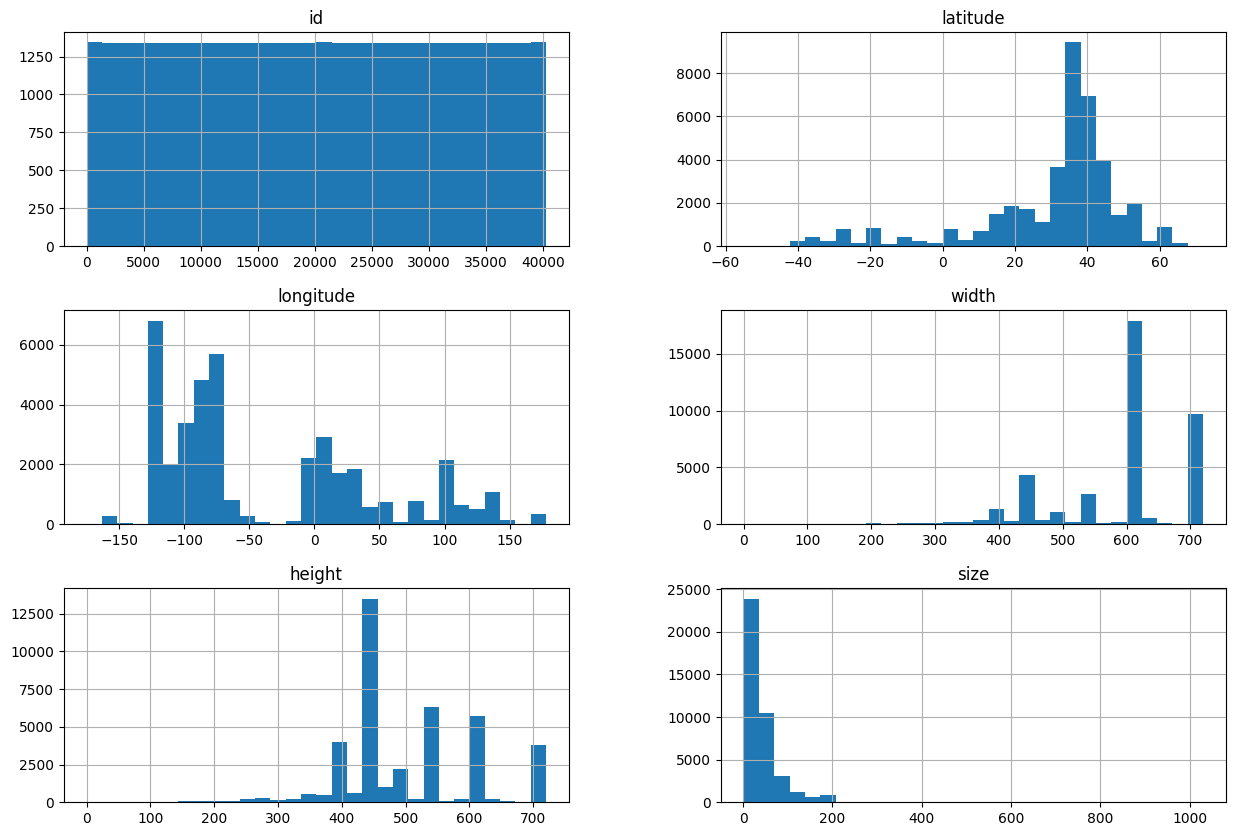

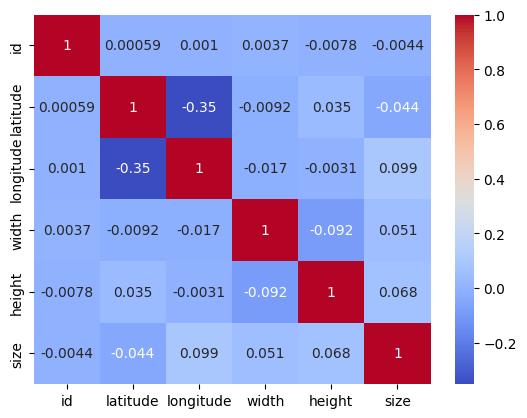

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of each feature
data.hist(bins=30, figsize=(15, 10))
plt.show()

# Visualize correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


## Data Preprocessing

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


##Model Building

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_data, target, test_size=0.2, random_state=42)


##Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7373649571588228
Confusion Matrix:
 [[5822  114]
 [2001  116]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.98      0.85      5936
           1       0.50      0.05      0.10      2117

    accuracy                           0.74      8053
   macro avg       0.62      0.52      0.47      8053
weighted avg       0.68      0.74      0.65      8053



##Model Evaluation and Tuning

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)



Best parameters: {'C': 0.1, 'solver': 'lbfgs'}
Best cross-validation accuracy: 0.736378006832105


##Evaluate the Tuned Model

In [8]:
# Predict with the best estimator
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Evaluate the tuned model
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Tuned Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("Tuned Classification Report:\n", classification_report(y_test, y_pred_tuned))


Tuned Accuracy: 0.7373649571588228
Tuned Confusion Matrix:
 [[5822  114]
 [2001  116]]
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.98      0.85      5936
           1       0.50      0.05      0.10      2117

    accuracy                           0.74      8053
   macro avg       0.62      0.52      0.47      8053
weighted avg       0.68      0.74      0.65      8053

